In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'c:/reposit/data/dacon/2023 전력사용량 예측 AI 경진대회/'

In [2]:
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv', encoding = 'utf-8')
building_info = pd.read_csv(path + 'building_info.csv', encoding = 'utf-8')

In [3]:
test

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [4]:
train = train.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train.drop('num_date_time', axis = 1, inplace=True)

building_info = building_info.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}

building_info['building_type'] = building_info['building_type'].replace(translation_dict)

test = test.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '전력소비량(kWh)': 'power_consumption'
})
test.drop('num_date_time', axis = 1, inplace=True)


In [5]:
train

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [6]:
train['date_time'] = pd.to_datetime(train['date_time'])
# train['month'] = train['date_time'].dt.month
train['day'] = train['date_time'].dt.day
train['hour'] = train['date_time'].dt.hour
train['weekday'] = train['date_time'].dt.weekday

test['date_time'] = pd.to_datetime(test['date_time'])
test['day'] = test['date_time'].dt.day
test['hour'] = test['date_time'].dt.hour
test['weekday'] = test['date_time'].dt.weekday

In [7]:
train.isnull().sum()

building_number           0
date_time                 0
temperature               0
rainfall             160069
windspeed                19
humidity                  9
sunshine              75182
solar_radiation       87913
power_consumption         0
day                       0
hour                      0
weekday                   0
dtype: int64

In [8]:
test.isnull().sum()

building_number    0
date_time          0
temperature        0
rainfall           0
windspeed          0
humidity           0
day                0
hour               0
weekday            0
dtype: int64

In [9]:
train = train.drop(['date_time','sunshine','solar_radiation','rainfall'],axis=1)
train

,building_number,temperature,windspeed,humidity,power_consumption,day,hour,weekday
0,1,18.6,0.9,42.0,1085.28,1,0,2
1,1,18.0,1.1,45.0,1047.36,1,1,2
2,1,17.7,1.5,45.0,974.88,1,2,2
3,1,16.7,1.4,48.0,953.76,1,3,2
4,1,18.4,2.8,43.0,986.40,1,4,2
...,...,...,...,...,...,...,...,...
203995,100,23.1,0.9,86.0,881.04,24,19,2
203996,100,22.4,1.3,86.0,798.96,24,20,2
203997,100,21.3,1.0,92.0,825.12,24,21,2
203998,100,21.0,0.3,94.0,640.08,24,22,2


In [10]:
train.describe()

,building_number,temperature,windspeed,humidity,power_consumption,day,hour,weekday
count,204000.000000,204000.000000,203981.000000,203991.000000,204000.000000,204000.000000,204000.000000,204000.000000
mean,50.500000,25.543524,2.134031,78.716295,2451.036462,14.835294,11.500000,2.988235
std,28.866141,3.779523,1.358109,15.080108,2440.648858,8.446178,6.922204,1.991127
min,1.000000,10.100000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000
25%,25.750000,23.400000,1.200000,69.000000,1085.760000,8.000000,5.750000,1.000000
50%,50.500000,25.700000,2.000000,81.000000,1766.400000,15.000000,11.500000,3.000000
75%,75.250000,28.100000,2.800000,91.000000,2970.000000,22.000000,17.250000,5.000000
max,100.000000,37.100000,13.300000,100.000000,25488.400000,31.000000,23.000000,6.000000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   building_number    204000 non-null  int64  
 1   temperature        204000 non-null  float64
 2   windspeed          203981 non-null  float64
 3   humidity           203991 non-null  float64
 4   power_consumption  204000 non-null  float64
 5   day                204000 non-null  int64  
 6   hour               204000 non-null  int64  
 7   weekday            204000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 12.5 MB


In [12]:
train.isnull().sum()

building_number       0
temperature           0
windspeed            19
humidity              9
power_consumption     0
day                   0
hour                  0
weekday               0
dtype: int64

In [13]:
# train['rainfall'].fillna(0, inplace=True)
train['windspeed'].fillna(method='ffill', inplace=True)
train['humidity'].fillna(method='ffill', inplace=True)

test['windspeed'].fillna(method='ffill', inplace=True)
test['humidity'].fillna(method='ffill', inplace=True)

In [14]:
train.isnull().sum()

building_number      0
temperature          0
windspeed            0
humidity             0
power_consumption    0
day                  0
hour                 0
weekday              0
dtype: int64

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   building_number    204000 non-null  int64  
 1   temperature        204000 non-null  float64
 2   windspeed          204000 non-null  float64
 3   humidity           204000 non-null  float64
 4   power_consumption  204000 non-null  float64
 5   day                204000 non-null  int64  
 6   hour               204000 non-null  int64  
 7   weekday            204000 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 12.5 MB


In [16]:
train.columns

Index(['building_number', 'temperature', 'windspeed', 'humidity',
       'power_consumption', 'day', 'hour', 'weekday'],
      dtype='object')

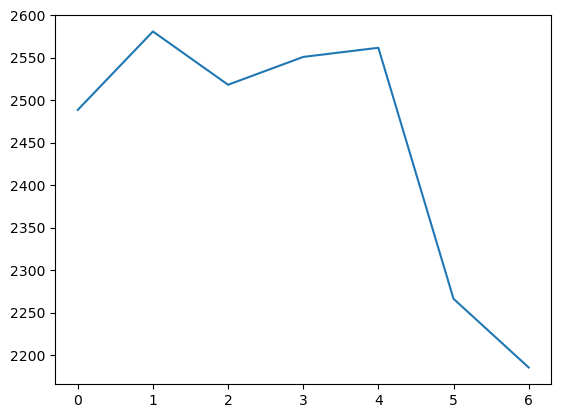

In [17]:
#요일별 전기사용량
power_consumption_day = train.groupby(['weekday'])['power_consumption'].mean()
plt.plot(power_consumption_day)
plt.show()

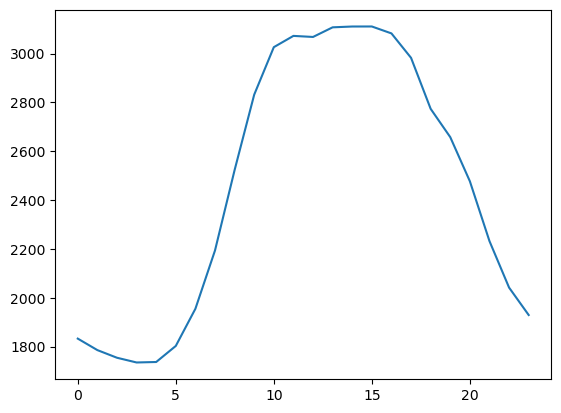

In [18]:
#시간별 전기사용량
power_consumption_day = train.groupby(['hour'])['power_consumption'].mean()
plt.plot(power_consumption_day)
plt.show()

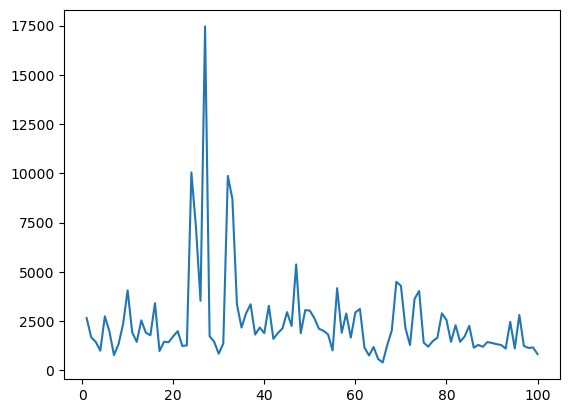

In [19]:
#건물유형별 전기사용량
power_consumption_day = train.groupby(['building_number'])['power_consumption'].mean()
plt.plot(power_consumption_day)
plt.show()

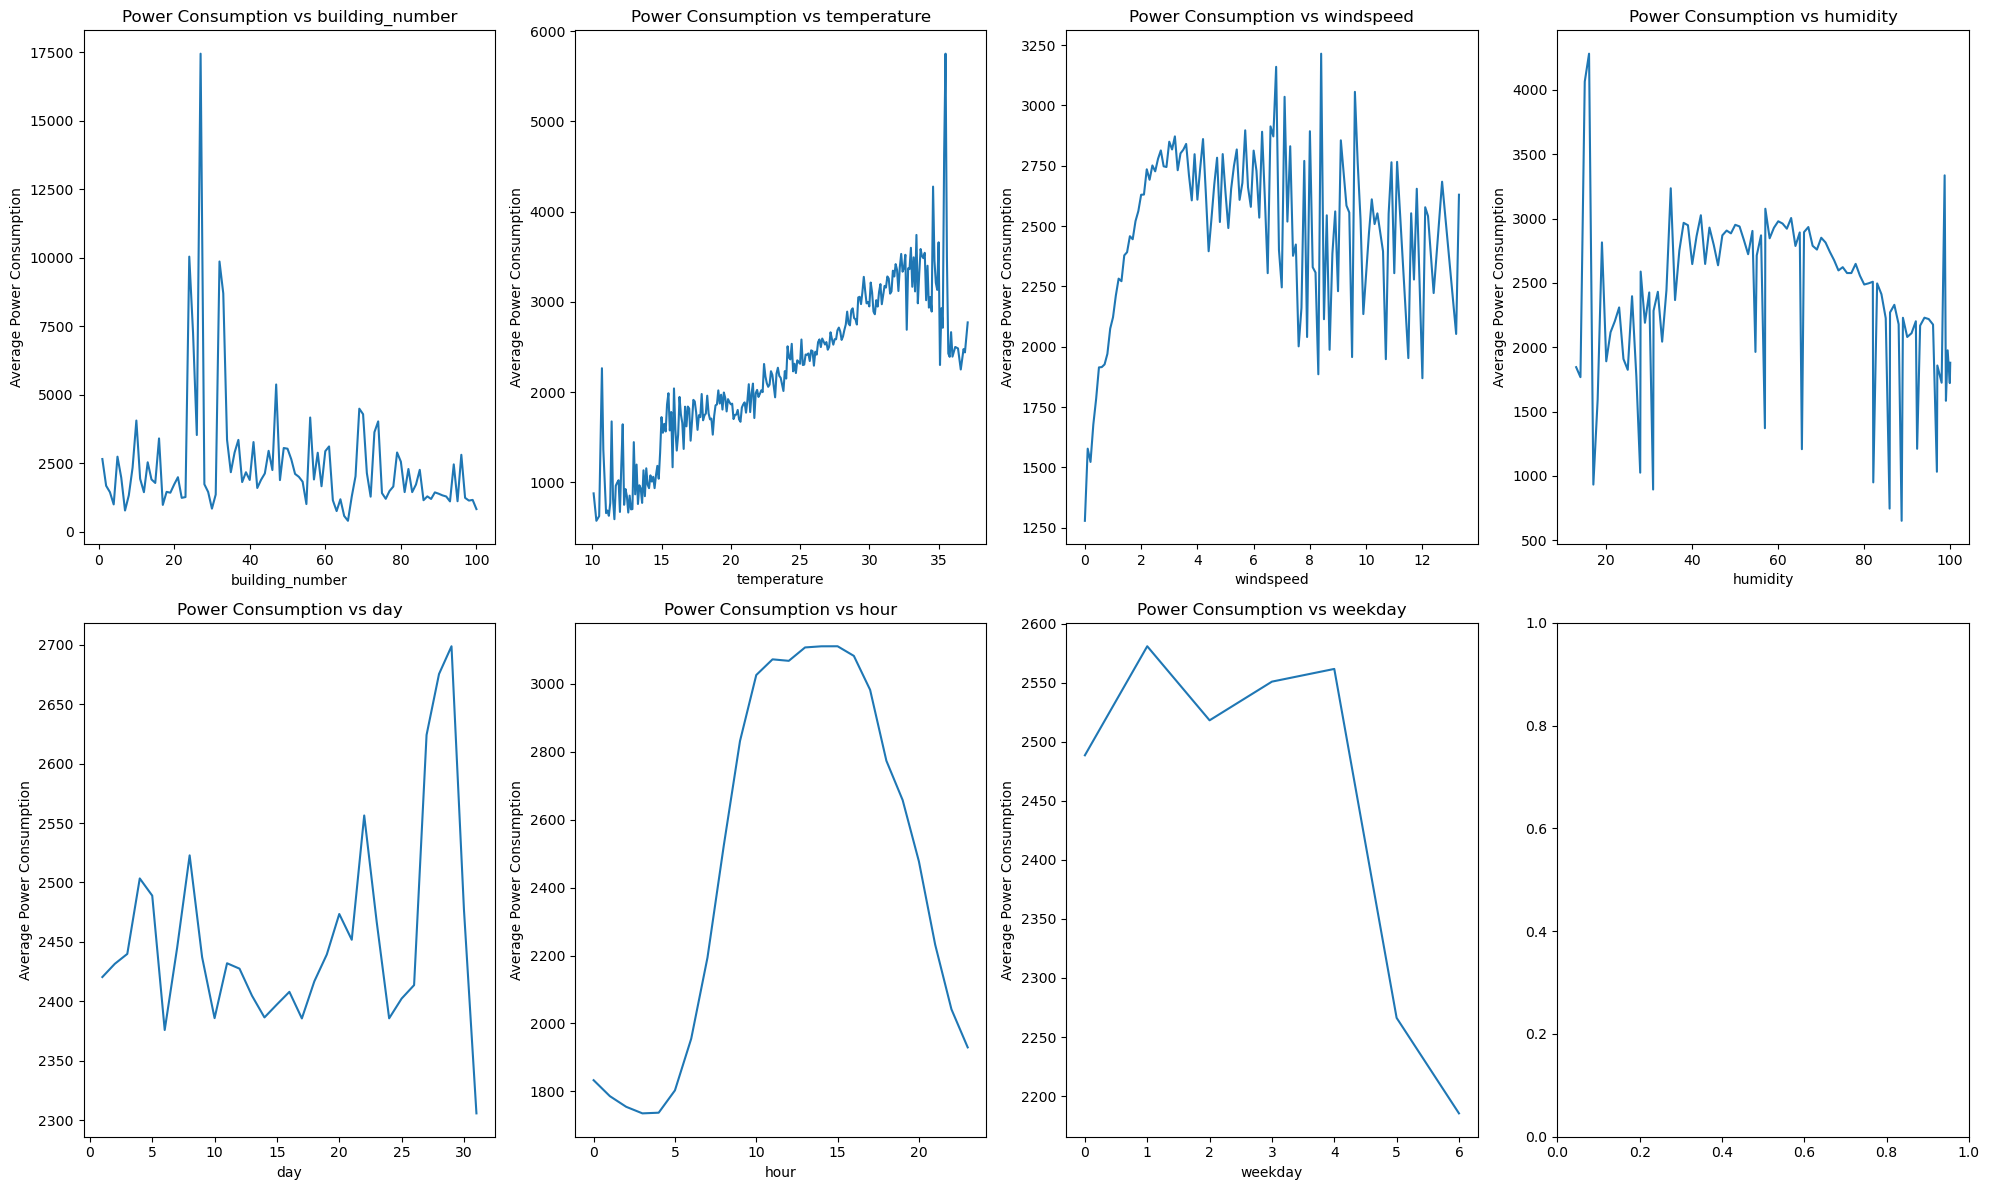

In [20]:
columns_to_plot = ['building_number', 'temperature', 'windspeed', 
                   'humidity', 'day', 'hour', 'weekday']

fig, axes = plt.subplots(2, 4, figsize=(20, 12))

for i, col in enumerate(columns_to_plot):
    avg_power_consumption = train.groupby(col)['power_consumption'].mean()
    
    row = i // 4
    col = i % 4
    axes[row, col].plot(avg_power_consumption.index, avg_power_consumption.values)
    axes[row, col].set_title(f'Power Consumption vs {columns_to_plot[i]}')
    axes[row, col].set_xlabel(columns_to_plot[i])
    axes[row, col].set_ylabel('Average Power Consumption')

plt.tight_layout()
plt.show()

## 피쳐 엔지니어링

In [21]:
train

,building_number,temperature,windspeed,humidity,power_consumption,day,hour,weekday
0,1,18.6,0.9,42.0,1085.28,1,0,2
1,1,18.0,1.1,45.0,1047.36,1,1,2
2,1,17.7,1.5,45.0,974.88,1,2,2
3,1,16.7,1.4,48.0,953.76,1,3,2
4,1,18.4,2.8,43.0,986.40,1,4,2
...,...,...,...,...,...,...,...,...
203995,100,23.1,0.9,86.0,881.04,24,19,2
203996,100,22.4,1.3,86.0,798.96,24,20,2
203997,100,21.3,1.0,92.0,825.12,24,21,2
203998,100,21.0,0.3,94.0,640.08,24,22,2


In [22]:
building_info.replace('-',0, inplace=True)
building_info

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,Other Buildings,110634.00,39570.00,0,0,0
1,2,Other Buildings,122233.47,99000.00,0,0,0
2,3,Other Buildings,171243.00,113950.00,40,0,0
3,4,Other Buildings,74312.98,34419.62,60,0,0
4,5,Other Buildings,205884.00,150000.00,0,2557,1000
...,...,...,...,...,...,...,...
95,96,Hotel and Resort,93314.00,60500.00,0,0,0
96,97,Hotel and Resort,55144.67,25880.00,0,0,0
97,98,Hotel and Resort,53578.62,17373.75,0,0,0
98,99,Hotel and Resort,53499.00,40636.00,0,0,0


In [23]:
train = pd.merge(train, building_info, on='building_number', how='left')
train

,building_number,temperature,windspeed,humidity,power_consumption,day,hour,weekday,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,18.6,0.9,42.0,1085.28,1,0,2,Other Buildings,110634.00,39570.00,0,0,0
1,1,18.0,1.1,45.0,1047.36,1,1,2,Other Buildings,110634.00,39570.00,0,0,0
2,1,17.7,1.5,45.0,974.88,1,2,2,Other Buildings,110634.00,39570.00,0,0,0
3,1,16.7,1.4,48.0,953.76,1,3,2,Other Buildings,110634.00,39570.00,0,0,0
4,1,18.4,2.8,43.0,986.40,1,4,2,Other Buildings,110634.00,39570.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,0.9,86.0,881.04,24,19,2,Hotel and Resort,57497.84,40035.23,0,0,0
203996,100,22.4,1.3,86.0,798.96,24,20,2,Hotel and Resort,57497.84,40035.23,0,0,0
203997,100,21.3,1.0,92.0,825.12,24,21,2,Hotel and Resort,57497.84,40035.23,0,0,0
203998,100,21.0,0.3,94.0,640.08,24,22,2,Hotel and Resort,57497.84,40035.23,0,0,0


In [24]:
test = pd.merge(test, building_info, on='building_number', how='left')

In [25]:
train['solar_power_capacity'] = train['solar_power_capacity'].astype(float)
train['ess_capacity'] = train['ess_capacity'].astype(float)
train['pcs_capacity'] = train['pcs_capacity'].astype(float)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204000 entries, 0 to 203999
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   building_number       204000 non-null  int64  
 1   temperature           204000 non-null  float64
 2   windspeed             204000 non-null  float64
 3   humidity              204000 non-null  float64
 4   power_consumption     204000 non-null  float64
 5   day                   204000 non-null  int64  
 6   hour                  204000 non-null  int64  
 7   weekday               204000 non-null  int64  
 8   building_type         204000 non-null  object 
 9   total_area            204000 non-null  float64
 10  cooling_area          204000 non-null  float64
 11  solar_power_capacity  204000 non-null  float64
 12  ess_capacity          204000 non-null  float64
 13  pcs_capacity          204000 non-null  float64
dtypes: float64(9), int64(4), object(1)
memory usage: 23.

In [26]:
test = test.drop(['date_time','rainfall'],axis=1)
test['solar_power_capacity'] = test['solar_power_capacity'].astype(float)
test['ess_capacity'] = test['ess_capacity'].astype(float)
test['pcs_capacity'] = test['pcs_capacity'].astype(float)

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16800 entries, 0 to 16799
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   building_number       16800 non-null  int64  
 1   temperature           16800 non-null  float64
 2   windspeed             16800 non-null  float64
 3   humidity              16800 non-null  int64  
 4   day                   16800 non-null  int64  
 5   hour                  16800 non-null  int64  
 6   weekday               16800 non-null  int64  
 7   building_type         16800 non-null  object 
 8   total_area            16800 non-null  float64
 9   cooling_area          16800 non-null  float64
 10  solar_power_capacity  16800 non-null  float64
 11  ess_capacity          16800 non-null  float64
 12  pcs_capacity          16800 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 1.8+ MB


In [27]:
# 인코딩
from sklearn.preprocessing import OrdinalEncoder

#문자열 피쳐
str_features = ['building_type']

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(train[str_features])
train[str_features] = ordinal_encoder.transform(train[str_features])
test[str_features] = ordinal_encoder.transform(test[str_features])

In [28]:
train

,building_number,temperature,windspeed,humidity,power_consumption,day,hour,weekday,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,18.6,0.9,42.0,1085.28,1,0,2,8.0,110634.00,39570.00,0.0,0.0,0.0
1,1,18.0,1.1,45.0,1047.36,1,1,2,8.0,110634.00,39570.00,0.0,0.0,0.0
2,1,17.7,1.5,45.0,974.88,1,2,2,8.0,110634.00,39570.00,0.0,0.0,0.0
3,1,16.7,1.4,48.0,953.76,1,3,2,8.0,110634.00,39570.00,0.0,0.0,0.0
4,1,18.4,2.8,43.0,986.40,1,4,2,8.0,110634.00,39570.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,23.1,0.9,86.0,881.04,24,19,2,6.0,57497.84,40035.23,0.0,0.0,0.0
203996,100,22.4,1.3,86.0,798.96,24,20,2,6.0,57497.84,40035.23,0.0,0.0,0.0
203997,100,21.3,1.0,92.0,825.12,24,21,2,6.0,57497.84,40035.23,0.0,0.0,0.0
203998,100,21.0,0.3,94.0,640.08,24,22,2,6.0,57497.84,40035.23,0.0,0.0,0.0


In [29]:
train['building_type'].nunique()

12

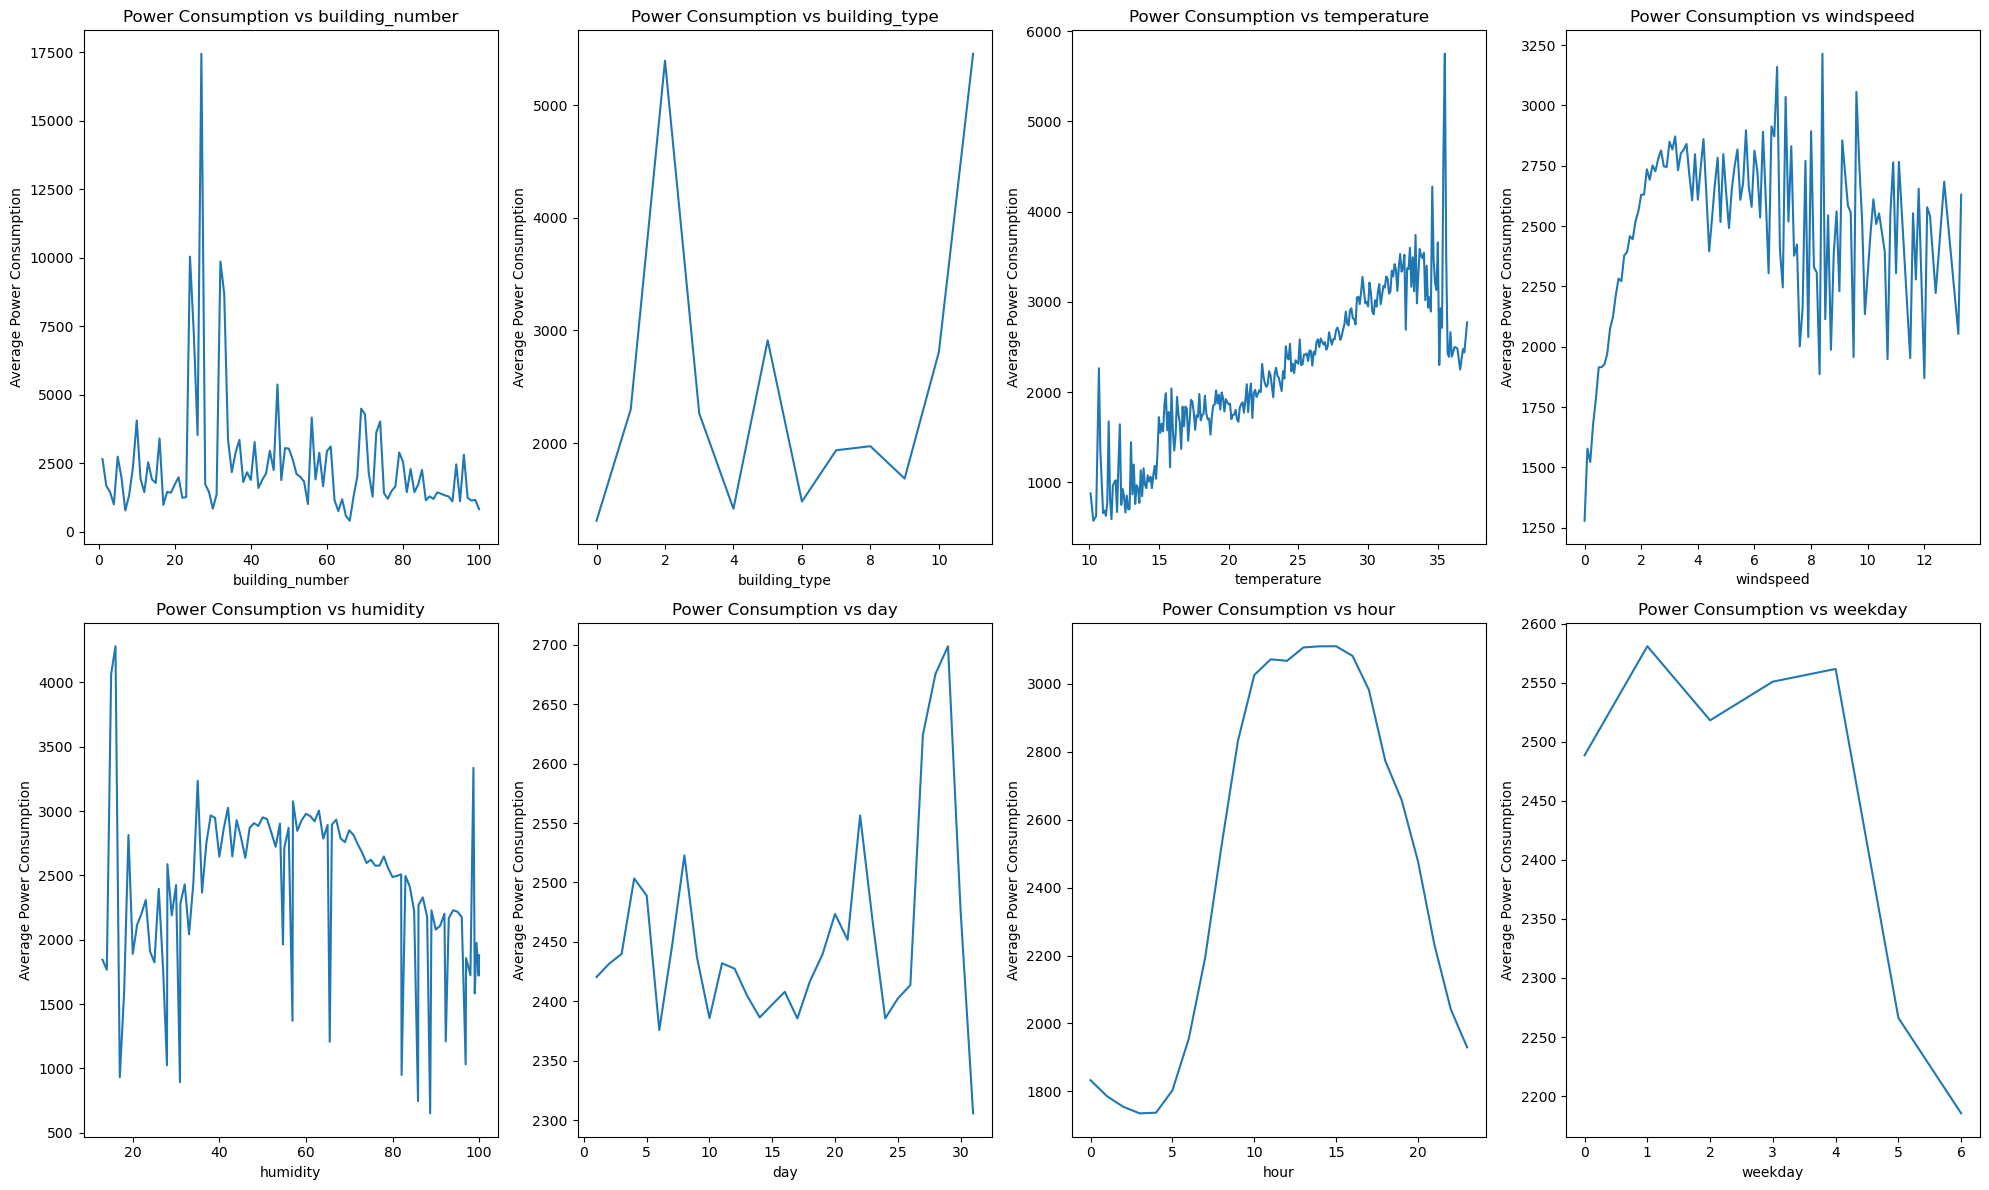

In [30]:
columns_to_plot = ['building_number', 'building_type', 'temperature', 'windspeed', 
                   'humidity', 'day', 'hour', 'weekday']

fig, axes = plt.subplots(2, 4, figsize=(20, 12))

for i, col in enumerate(columns_to_plot):
    avg_power_consumption = train.groupby(col)['power_consumption'].mean()
    
    row = i // 4
    col = i % 4
    axes[row, col].plot(avg_power_consumption.index, avg_power_consumption.values)
    axes[row, col].set_title(f'Power Consumption vs {columns_to_plot[i]}')
    axes[row, col].set_xlabel(columns_to_plot[i])
    axes[row, col].set_ylabel('Average Power Consumption')

plt.tight_layout()
plt.show()

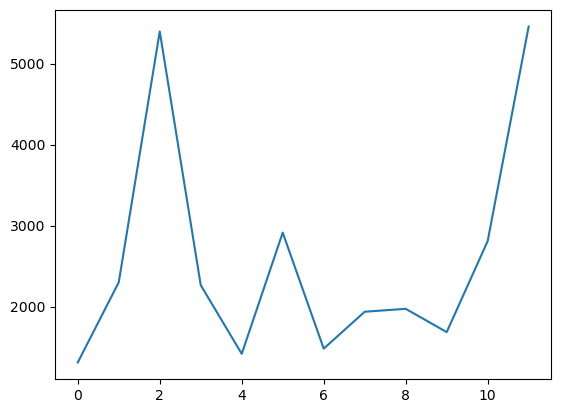

In [31]:
#건물유형별 전기사용량
power_consumption_day = train.groupby(['building_type'])['power_consumption'].mean()
plt.plot(power_consumption_day)
plt.show()

In [32]:
train.columns

Index(['building_number', 'temperature', 'windspeed', 'humidity',
       'power_consumption', 'day', 'hour', 'weekday', 'building_type',
       'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity',
       'pcs_capacity'],
      dtype='object')

## 모델링

In [33]:
X = train.drop('power_consumption',axis=1)
y = train['power_consumption']

In [34]:
# import numpy as np
# log_y = np.log(y)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((163200, 13), (163200,), (40800, 13), (40800,))

In [36]:
test

,building_number,temperature,windspeed,humidity,day,hour,weekday,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,23.5,2.2,72,25,0,3,8.0,110634.00,39570.00,0.0,0.0,0.0
1,1,23.0,0.9,72,25,1,3,8.0,110634.00,39570.00,0.0,0.0,0.0
2,1,22.7,1.5,75,25,2,3,8.0,110634.00,39570.00,0.0,0.0,0.0
3,1,22.1,1.3,78,25,3,3,8.0,110634.00,39570.00,0.0,0.0,0.0
4,1,21.8,1.0,77,25,4,3,8.0,110634.00,39570.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.9,84,31,19,2,6.0,57497.84,40035.23,0.0,0.0,0.0
16796,100,20.7,0.4,95,31,20,2,6.0,57497.84,40035.23,0.0,0.0,0.0
16797,100,20.2,0.4,98,31,21,2,6.0,57497.84,40035.23,0.0,0.0,0.0
16798,100,20.1,1.1,97,31,22,2,6.0,57497.84,40035.23,0.0,0.0,0.0


In [37]:
#MinMaxScaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test)

X_train = X_train_scaled
X_val = X_val_scaled
X_test = X_test_scaled

## 베이스 모델 : 결정트리

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)

# 데이터셋과 특성 이름 준비
data = pd.DataFrame(X_train, columns=['building_number', 'temperature', 'windspeed', 'humidity',
       'day', 'hour', 'weekday', 'building_type',
       'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity',
       'pcs_capacity']) 

# 모델 훈련
tree.fit(data, y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
# from sklearn.tree import DecisionTreeRegressor
# tree = DecisionTreeRegressor(random_state=0)
# tree.fit(X_train, y_train)

In [40]:
# depth, level을 조회
tree.get_depth() 

47

In [41]:
# leaf node의 개수
tree.get_n_leaves()

162274

In [42]:
X_val

array([[0.51515152, 0.80740741, 0.42105263, ..., 0.04025765, 0.        ,
        0.        ],
       [0.94949495, 0.28518519, 0.17293233, ..., 0.        , 0.        ,
        0.        ],
       [0.50505051, 0.53333333, 0.03759398, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16161616, 0.80740741, 0.2406015 , ..., 0.        , 0.        ,
        0.        ],
       [0.12121212, 0.22962963, 0.18796992, ..., 0.        , 0.        ,
        0.        ],
       [0.52525253, 0.61851852, 0.03007519, ..., 0.        , 0.        ,
        0.        ]])

In [43]:
data_val = pd.DataFrame(X_val, columns=['building_number', 'temperature', 'windspeed', 'humidity',
       'day', 'hour', 'weekday', 'building_type',
       'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity',
       'pcs_capacity']) 

#예측
pred_val_tree = tree.predict(data_val)
# pred_val_tree = np.exp(pred_val_tree)

In [44]:
from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score)

### 평가
print("RandomForestRegressor")
print(f"MSE : {mean_squared_error(y_val, pred_val_tree)}")
print(f"MAE : {mean_absolute_error(y_val, pred_val_tree)}")
print(f"R2 : {r2_score(y_val, pred_val_tree)}")

RandomForestRegressor
MSE : 55957.92023658014
MAE : 113.64041906806374
R2 : 0.990649055758183


In [45]:
tree.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [46]:
test

,building_number,temperature,windspeed,humidity,day,hour,weekday,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,23.5,2.2,72,25,0,3,8.0,110634.00,39570.00,0.0,0.0,0.0
1,1,23.0,0.9,72,25,1,3,8.0,110634.00,39570.00,0.0,0.0,0.0
2,1,22.7,1.5,75,25,2,3,8.0,110634.00,39570.00,0.0,0.0,0.0
3,1,22.1,1.3,78,25,3,3,8.0,110634.00,39570.00,0.0,0.0,0.0
4,1,21.8,1.0,77,25,4,3,8.0,110634.00,39570.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,100,22.5,0.9,84,31,19,2,6.0,57497.84,40035.23,0.0,0.0,0.0
16796,100,20.7,0.4,95,31,20,2,6.0,57497.84,40035.23,0.0,0.0,0.0
16797,100,20.2,0.4,98,31,21,2,6.0,57497.84,40035.23,0.0,0.0,0.0
16798,100,20.1,1.1,97,31,22,2,6.0,57497.84,40035.23,0.0,0.0,0.0


## 랜덤포레스트 (그리드서치)

In [47]:
# 요일 넣고 스케일링 하고 얻은 값(decisiontree)
# best score: 0.9919109068853414
# best parameter: {'max_leaf_nodes': 11001, 'max_features': 1.0, 'max_depth': 41}

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 랜덤포레스트 모델 생성
randomforest = RandomForestRegressor()
param_grid = {
    'max_depth': [20, 40],
    'max_features': [1, 2],
    'max_leaf_nodes': [None, 10000, 11000]
}

# RandomForestRegressor 모델 생성
rf_model = RandomForestRegressor(random_state=42)

# GridSearchCV를 사용한 매개변수 탐색
gs = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
gs.fit(data, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 40], 'max_features': [1, 2],
                         'max_leaf_nodes': [None, 10000, 11000]},
             verbose=2)

In [49]:
print("best score:", gs.best_score_)
print("best parameter:", gs.best_params_)

best score: 0.9882807737085336
best parameter: {'max_depth': 40, 'max_features': 2, 'max_leaf_nodes': None}


In [50]:
best_gs = gs.best_estimator_

## 랜덤포레스트 (랜덤서치)

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# 랜덤포레스트 모델 생성
randomforest = RandomForestRegressor(random_state=0)
params = {
    'max_depth' : range(1,44), 
    'max_leaf_nodes' : np.arange(1,202724,10000),
    'max_features' : np.arange(0.1,1.1,0.1)}

rs = RandomizedSearchCV(randomforest,  #최적화할 모델
                        params, #파라미터 후보 딕셔너리
                        n_iter=500, # 테스트해볼 조합의 개수
                        scoring="r2", 
                        cv=4, 
                        n_jobs=-1
                       )
rs.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print("best score:", rs.best_score_)
print("best parameter:", rs.best_params_)

In [ ]:
best_rs = rs.best_estimator_

In [ ]:
# pred_val_rs = best_rs.predict(X_train)

# print("DecisionTreeRegressor")
# print(f"MSE : {mean_squared_error(y_train, pred_train_rs)}")
# print(f"MAE : {mean_absolute_error(y_train, pred_train_rs)}")
# print(f"R2 : {r2_score(y_train, pred_train_rs)}")

## Test

In [ ]:
# 데이터셋과 특성 이름 준비
data_test = pd.DataFrame(X_test, columns=['building_number', 'temperature', 'windspeed', 'humidity',
       'day', 'hour', 'weekday', 'building_type',
       'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity',
       'pcs_capacity']) 

pred_tree = tree.predict(data_test)
pred_tree

In [ ]:
submission = pd.read_csv('.\\power usage data\\sample_submission.csv')
submission

In [ ]:
preds = pd.Series(pred_tree.reshape(-1))

In [ ]:
submission['answer'] = pred_tree
submission

In [ ]:
submission.to_csv('.\\power usage data\\submission(tree,sc,in).csv', index=False)